In [137]:
import pandas as pd
import numpy as np

In [138]:
df = pd.read_csv('magic.csv')
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [139]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [141]:
df.duplicated().sum()

np.int64(115)

In [142]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [143]:
# xoá duplicate
df = df.drop_duplicates()

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
lst = []
for col in df.columns:
    a = df.groupby('class')[col].value_counts()
    a = pd.DataFrame(a).reset_index()
    lst.append(a)

In [146]:
a

,class,count
0,g,12332
1,h,6573


In [147]:
# fig, axes = plt.subplots(2, 5, figsize=(15,15))
# # axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
# axes = axes.flatten()
# for i,col in enumerate(df.iloc[: , :-1].columns):
    
#     sns.histplot(x=col, data=df, hue='class',ax = axes[i])

#     plt.show()

<Axes: xlabel='fLength', ylabel='Count'>

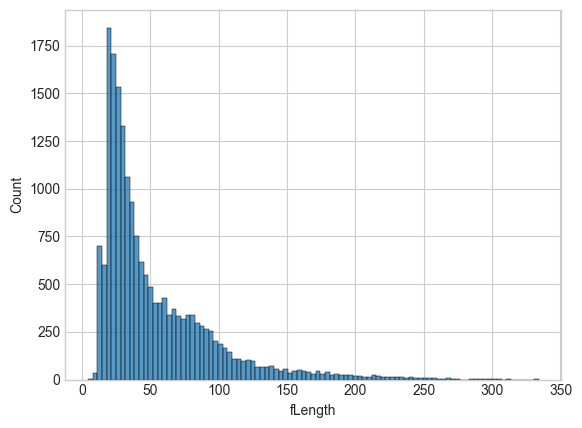

In [148]:
sns.histplot(data=df['fLength'])

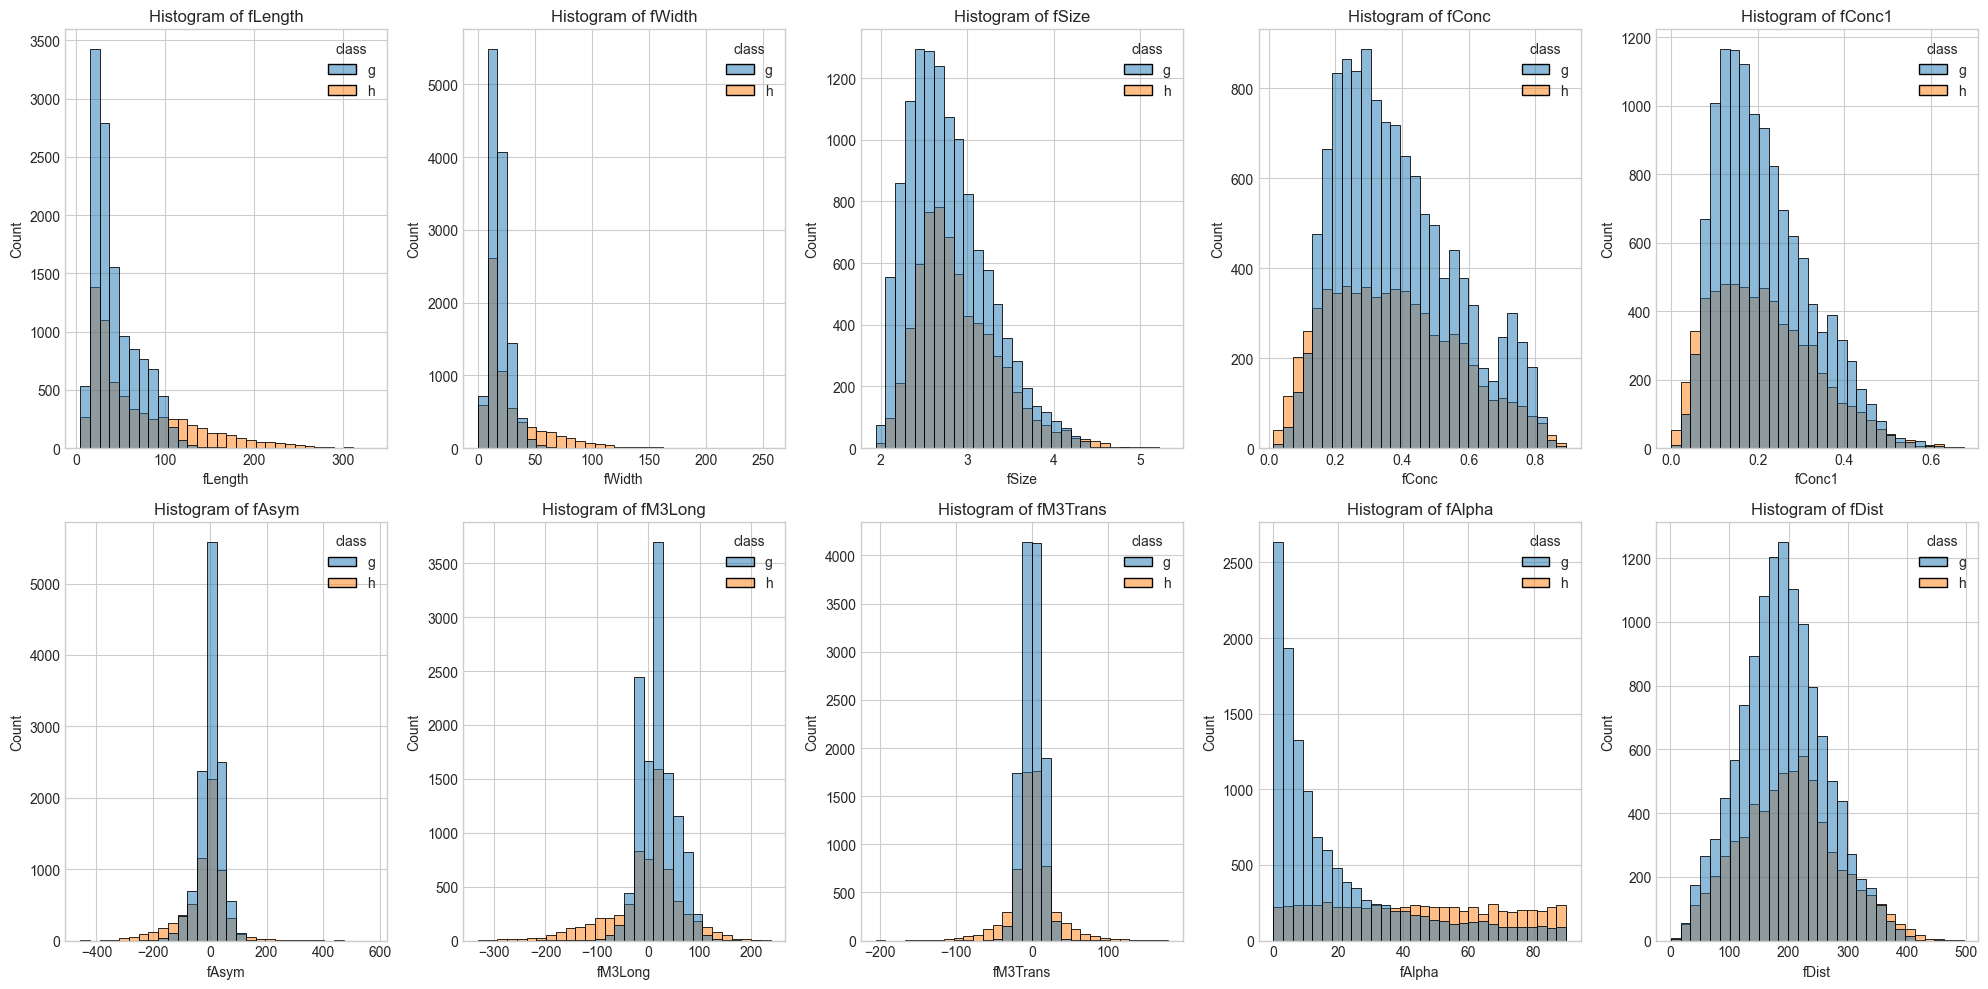

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.iloc[:, :-1].columns
class_column = df.iloc[:, -1]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, hue=class_column, ax=axes[i], bins=30)
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()


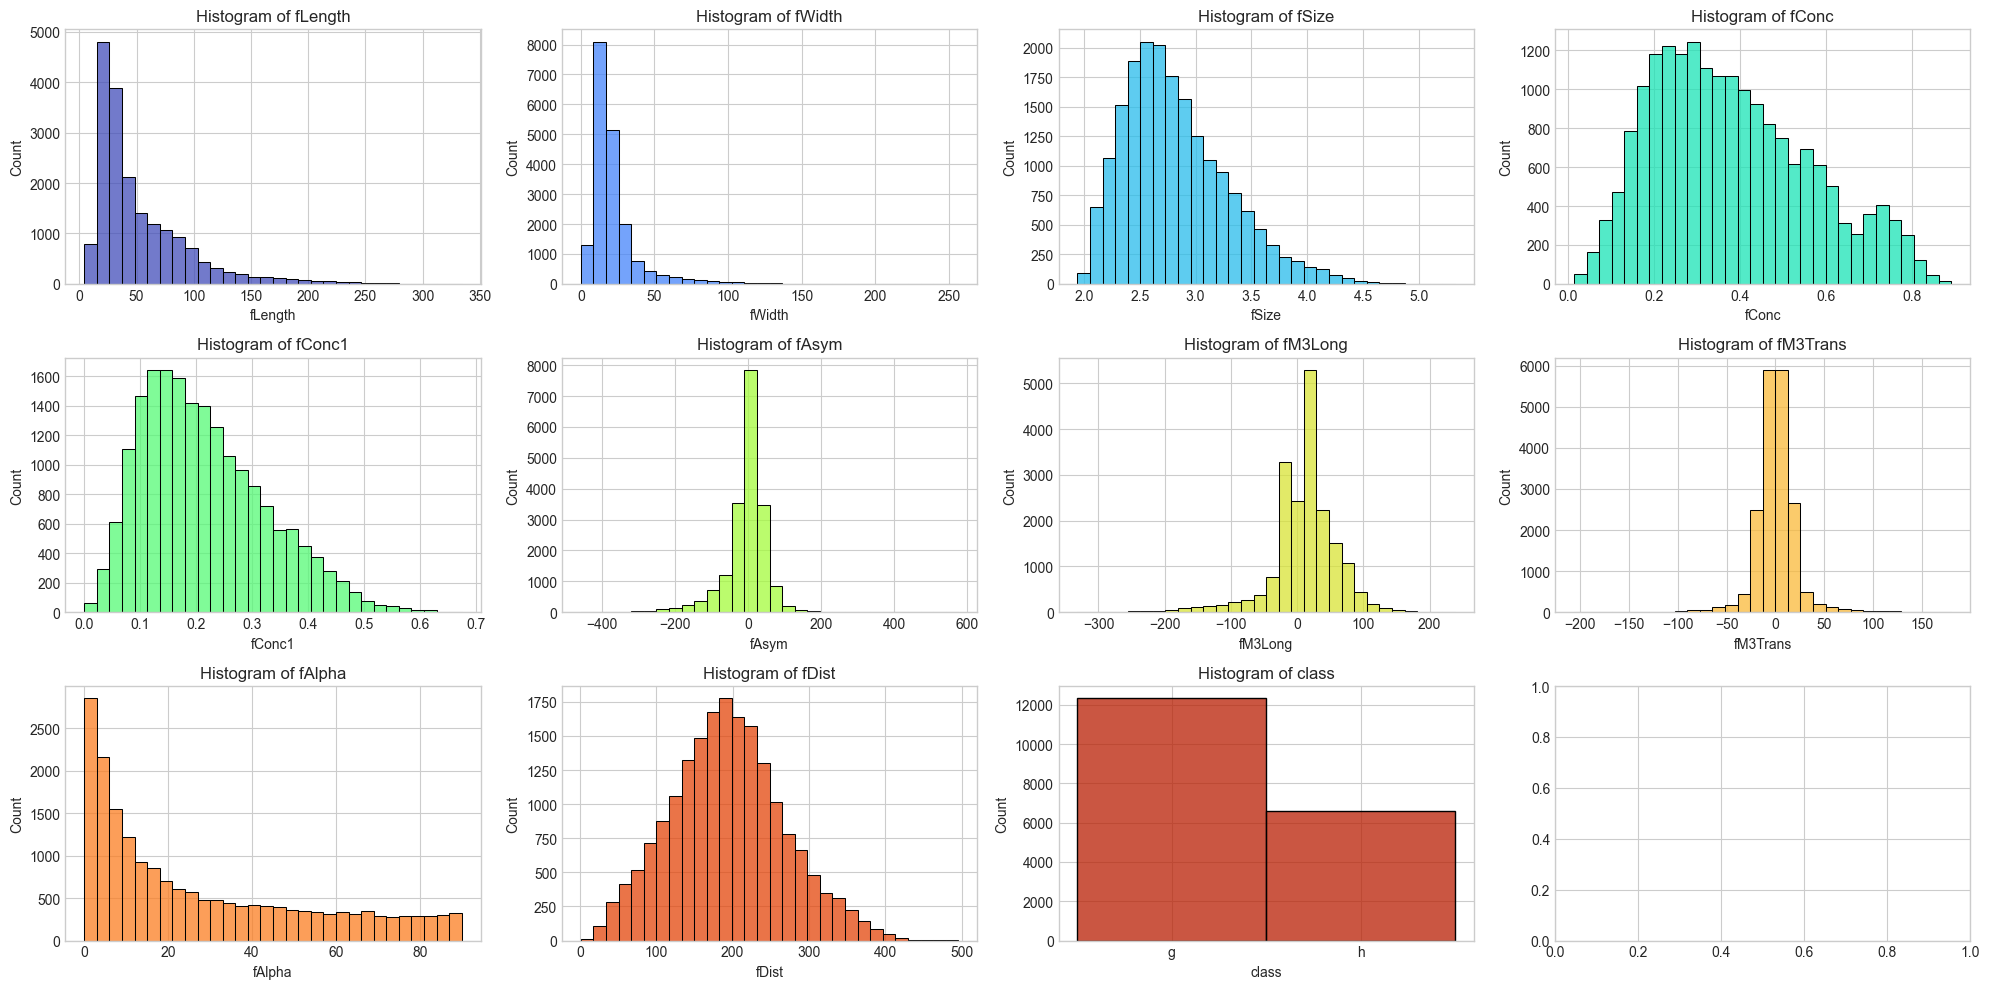

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
vibrant_palette = sns.color_palette("turbo", len(df.columns))

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], ax=axes[i], bins=30,  color=vibrant_palette[i % len(vibrant_palette)])
    axes[i].set_title(f"Histogram of {col}")

# Adjust layout and display
plt.tight_layout()
plt.show()


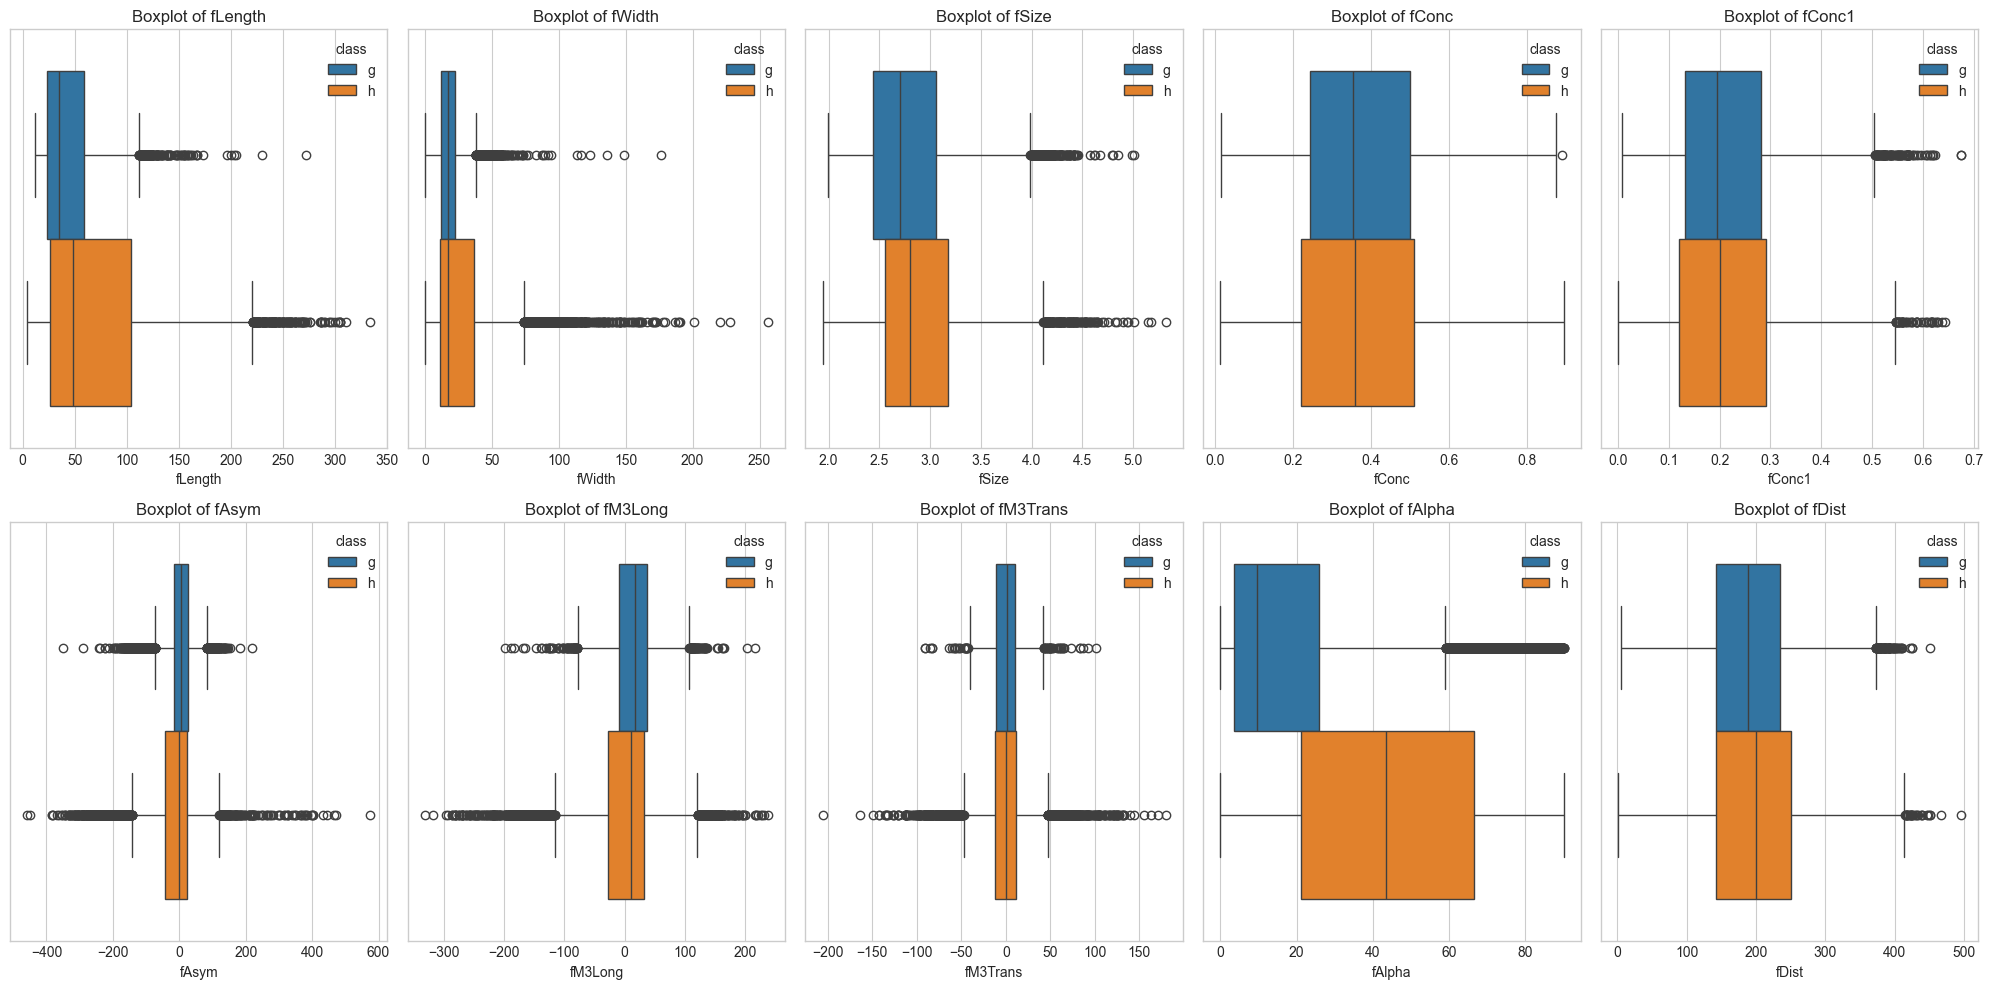

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the last column is the target (class)
columns = df.iloc[:, :-1].columns
class_column = df.iloc[:, -1]

# Create subplots for 10 histograms
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Plot each feature's histogram
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, hue=class_column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Adjust layout and display
plt.tight_layout()
plt.show()


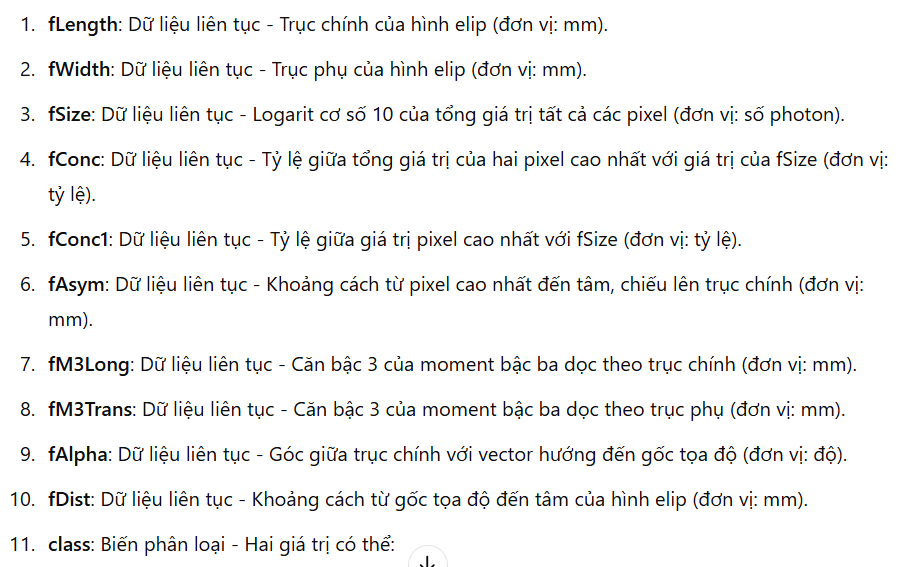

In [152]:
from scipy.stats import shapiro, bartlett
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
from statsmodels.api import Logit
import statsmodels.api as sm

In [153]:
# chuẩn hoá bằng robust scaler
from sklearn.preprocessing import RobustScaler
df_original = df.copy()
scaler = RobustScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.182674,-0.088930,-0.152404,0.141203,0.011502,0.529839,0.137195,-0.410963,0.561342,-1.120330,g
1,-0.121140,-0.422201,-0.354968,0.658573,1.155911,0.497826,0.174466,-0.491510,-0.277999,0.136835,g
2,2.738586,9.260426,2.117308,-1.182667,-1.135463,2.525701,-1.648811,-2.110013,1.478740,0.661871,g
3,-0.291836,-0.589724,-0.643429,0.973851,1.251118,0.518862,-0.448229,-0.362700,-0.176273,-0.765182,g
4,0.833193,1.073102,0.674840,-0.138962,-0.084345,-0.214975,0.271687,0.968079,-0.320621,1.677502,g


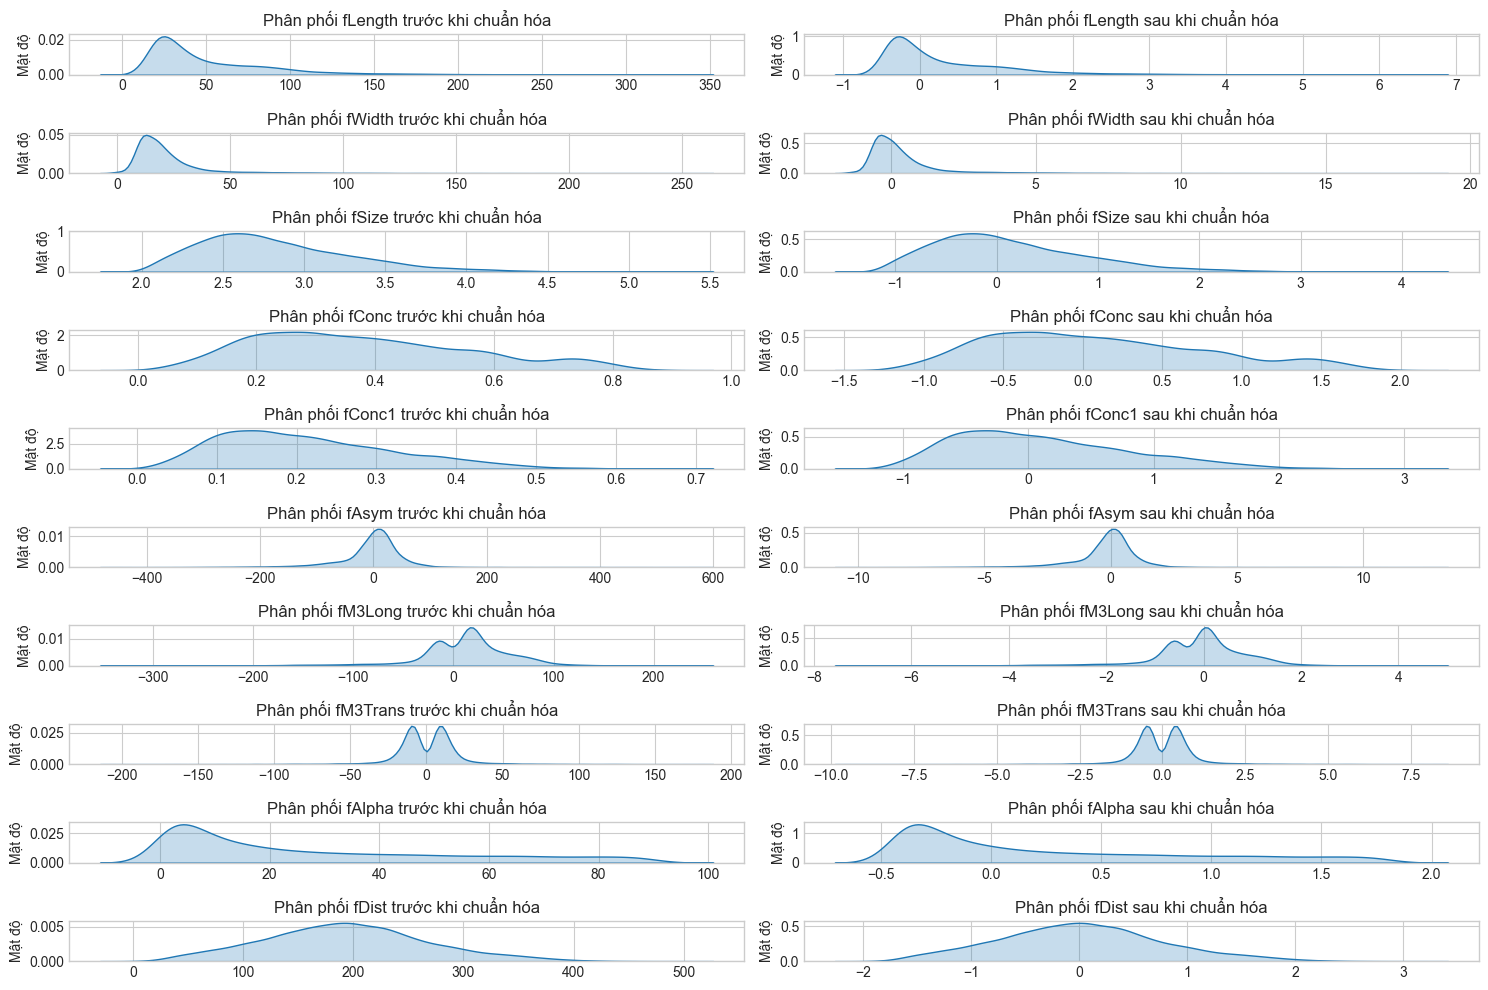

In [154]:

# Danh sách các cột cần vẽ
columns = df.columns[:-1]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 10))

# Vẽ biểu đồ KDE cho từng cột trước và sau khi chuẩn hóa
for i, col in enumerate(columns):
    plt.subplot(len(columns), 2, 2*i + 1)
    sns.kdeplot(df_original[col], fill=True)
    plt.title(f'Phân phối {col} trước khi chuẩn hóa')
    plt.xlabel('')
    plt.ylabel('Mật độ')

    plt.subplot(len(columns), 2, 2*i + 2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Phân phối {col} sau khi chuẩn hóa')
    plt.xlabel('')
    plt.ylabel('Mật độ')

plt.tight_layout()
plt.show()

In [155]:
df['class'] = df['class'].map({'g': 0, 'h': 1})

C:\Users\quynh\AppData\Local\Temp\ipykernel_4176\431018819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].map({'g': 0, 'h': 1})


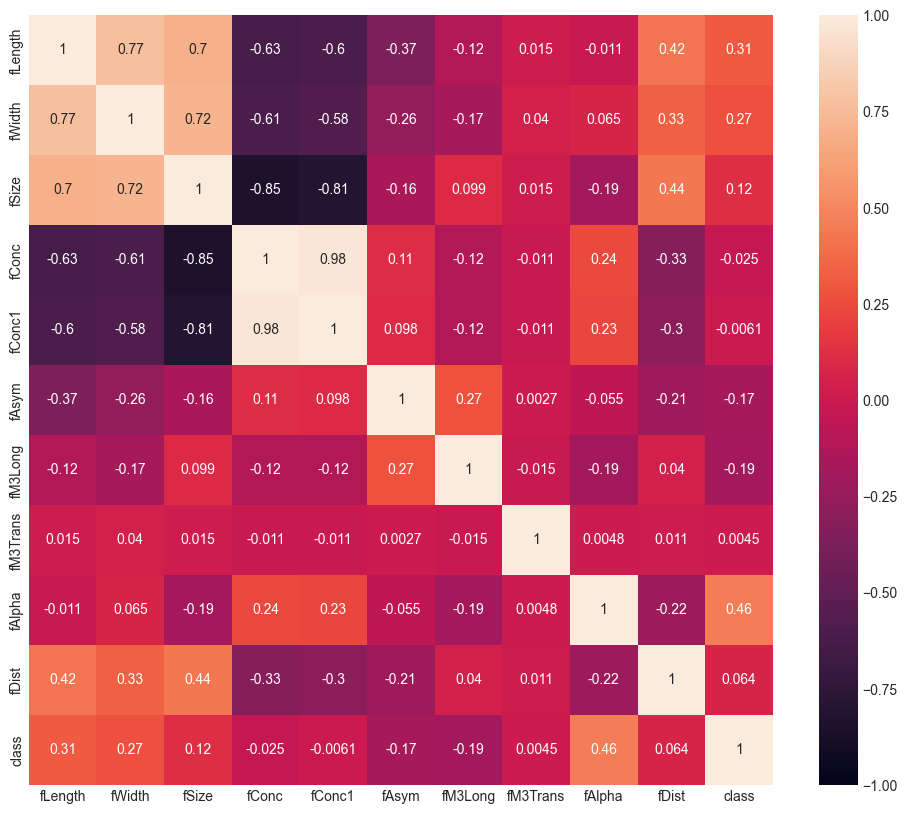

In [156]:
cor = df.corr()
plt.figure(figsize=(12,10))

sns.heatmap(data=cor, annot=True,
            vmin=-1, vmax=1);

In [157]:
x1 = df['fLength']
x2 = df['fWidth']
x3 = df['fSize']
x4 = df['fConc']
x5 = df['fConc1']
x6 = df['fAsym']
x7 = df['fM3Long']
x8 = df['fM3Trans']
x9 = df['fAlpha']
x10 = df['fDist']
y = df['class']



In [158]:
def calculate_vif(df):
    # trích xuất các giá trị của dataframe
    X = df.values
    # tạo một dataframe rỗng để lưu kq vif
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

In [159]:
X_0 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7, 'x8':x8, 'x9':x9, 'x10':x10})
print(calculate_vif(X_0))

  feature        VIF
0      x1   3.361700
1      x2   3.489899
2      x3   5.082901
3      x4  28.056350
4      x5  22.969670
5      x6   1.284958
6      x7   1.247024
7      x8   1.002697
8      x9   1.341576
9     x10   1.356828


In [160]:
# # cột class chuyển thành dạng số g = 0, h = 1
# y = y.map({'g': 0, 'h': 1})

In [161]:
# import pandas as pd
# import statsmodels.api as sm
# X = X_0
# Y = y
# # Thêm cột hằng
# X = sm.add_constant(X_0)
              

# # Xây dựng mô hình hồi quy
# model = sm.OLS(Y, X).fit()

# # Tóm tắt kết quả
# print(model.summary())


In [162]:
X = X_0  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.455592
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18894
Method:                           MLE   Df Model:                           10
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.2948
Time:                        13:54:52   Log-Likelihood:                -8613.0
converged:                       True   LL-Null:                       -12213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8102      0.028    -63.889      0.000      -1.866      -1.755
x1             1.3525      0.

- loại bỏ x4

In [163]:
X_1 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x5':x5, 'x6':x6, 'x7':x7, 'x8':x8, 'x9':x9, 'x10':x10})
print(calculate_vif(X_1))

  feature       VIF
0      x1  3.354834
1      x2  3.488598
2      x3  4.430091
3      x5  2.605865
4      x6  1.284953
5      x7  1.246189
6      x8  1.002685
7      x9  1.326874
8     x10  1.355750


In [164]:
X = X_1  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.455592
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18895
Method:                           MLE   Df Model:                            9
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.2948
Time:                        13:54:53   Log-Likelihood:                -8613.0
converged:                       True   LL-Null:                       -12213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8101      0.028    -64.831      0.000      -1.865      -1.755
x1             1.3525      0.

- loại bỏ x6

In [165]:
X_2 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x5':x5, 'x7':x7, 'x8':x8, 'x9':x9, 'x10':x10})
print(calculate_vif(X_2))

  feature       VIF
0      x1  3.116099
1      x2  3.486757
2      x3  4.419570
3      x5  2.602137
4      x7  1.186154
5      x8  1.002568
6      x9  1.326772
7     x10  1.339319


In [166]:
X = X_2  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.455593
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18896
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.2948
Time:                        13:54:53   Log-Likelihood:                -8613.0
converged:                       True   LL-Null:                       -12213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8100      0.028    -64.856      0.000      -1.865      -1.755
x1             1.3505      0.

- loại bỏ x8

In [167]:
X_3 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x5':x5, 'x7':x7, 'x9':x9, 'x10':x10})
print(calculate_vif(X_3))

  feature       VIF
0      x1  3.113817
1      x2  3.479723
2      x3  4.418399
3      x5  2.601870
4      x7  1.186123
5      x9  1.326681
6     x10  1.339205


In [168]:
X = X_3  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.455599
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18897
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.2947
Time:                        13:54:53   Log-Likelihood:                -8613.1
converged:                       True   LL-Null:                       -12213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8096      0.028    -64.871      0.000      -1.864      -1.755
x1             1.3507      0.

In [169]:
X_4 = pd.DataFrame({'x1': x1,'x2': x2, 'x3':x3, 'x5':x5, 'x7':x7, 'x9':x9})
print(calculate_vif(X_4))

  feature       VIF
0      x1  3.006510
1      x2  3.478994
2      x3  4.263751
3      x5  2.569950
4      x7  1.185611
5      x9  1.256374


In [170]:
X = X_4  # Lựa chọn các biến phù hợp từ kết quả VIF
X = sm.add_constant(X)
model = Logit(y,X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.455685
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18898
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.2946
Time:                        13:54:53   Log-Likelihood:                -8614.7
converged:                       True   LL-Null:                       -12213.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8147      0.028    -65.362      0.000      -1.869      -1.760
x1             1.3740      0.

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=42)

# Huan luyen mo hinh
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept va Cofficient
intercept = model.intercept_
cofficient = model.coef_
print(f' He so chan Intercept: {intercept}')
print(f' He so hoi quy ung voi tung dac trung Cofficients: {cofficient}')

# Du doan tren tap Test
y_pred = model.predict(X_test)


# Danh gia mo hinh
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

 He so chan Intercept: [-1.79953135]
 He so hoi quy ung voi tung dac trung Cofficients: [[ 1.38892417  0.05838024  0.38214339  0.82745869 -0.35185517  1.79908189]]
Accuracy:  0.7884157630256546
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2486
           1       0.74      0.59      0.66      1295

    accuracy                           0.79      3781
   macro avg       0.77      0.74      0.75      3781
weighted avg       0.78      0.79      0.78      3781



 He so chan Intercept: [-1.79953135]
 He so hoi quy ung voi tung dac trung Cofficients: [[ 1.38892417  0.05838024  0.38214339  0.82745869 -0.35185517  1.79908189]]
ROC AUC:  0.8421793704979545
False Positive Rate:  [0.         0.         0.         ... 0.99879324 0.99879324 1.        ]
True Positive Rate:  [0.00000000e+00 7.72200772e-04 1.12741313e-01 ... 9.99227799e-01
 1.00000000e+00 1.00000000e+00]
Thresholds:  [       inf 0.99996841 0.98308772 ... 0.0470001  0.046946   0.04252942]
Accuracy:  0.7884157630256546
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2486
           1       0.74      0.59      0.66      1295

    accuracy                           0.79      3781
   macro avg       0.77      0.74      0.75      3781
weighted avg       0.78      0.79      0.78      3781



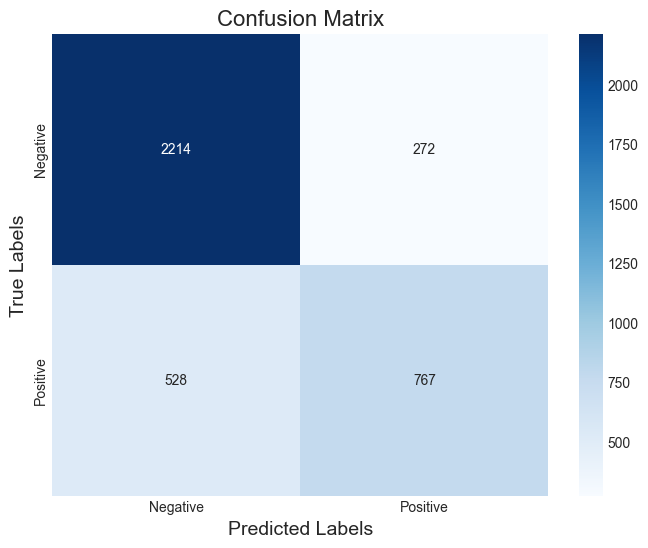

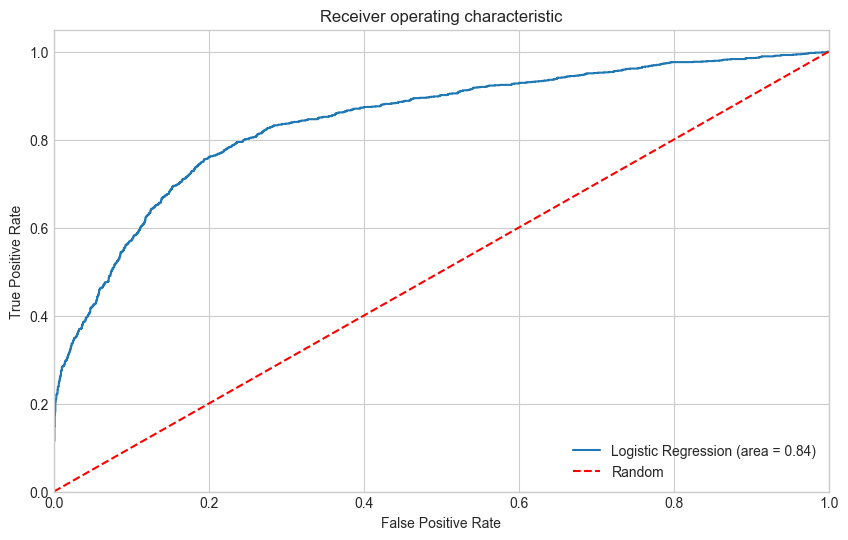

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=42)

# Huan luyen mo hinh
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept va Cofficient
intercept = model.intercept_
cofficient = model.coef_
print(f' He so chan Intercept: {intercept}')
print(f' He so hoi quy ung voi tung dac trung Cofficients: {cofficient}')

# Du doan tren tap Test
y_pred = model.predict(X_test)

# ROC AUC
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC: ', roc_auc)


# Đường cong ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('False Positive Rate: ', fpr)
print('True Positive Rate: ', tpr)
print('Thresholds: ', thresholds)

# Danh gia mo hinh
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Cấu hình biểu đồ
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()
# Vẽ đường cong ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
